In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [32]:
df_2019 = pd.read_csv('Resources/2019.csv')

In [33]:
df_2019.head()


,Unnamed: 0,Country,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family/Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,0,Finland,2019,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,NaN,NaN,NaN
1,1,Denmark,2019,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,NaN,NaN,NaN
2,2,Norway,2019,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,NaN,NaN,Economy
3,3,Iceland,2019,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,NaN,NaN,1.684
4,4,Netherlands,2019,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,NaN,NaN,0.00


# Happiness Histogram

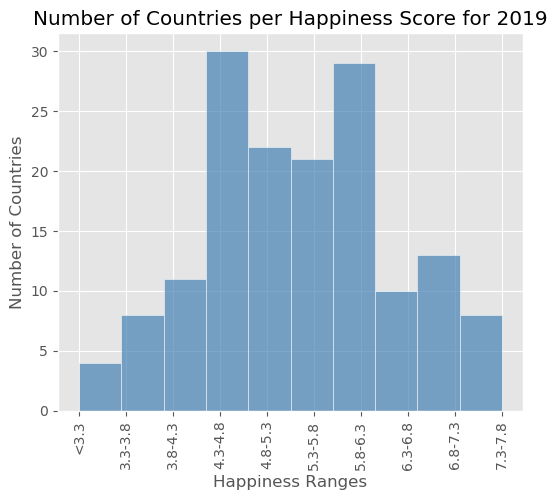

In [156]:
# create Histogram

happy_df = df_2019
happy_df = happy_df.sort_values("Happiness Score", ascending=True)


# Create the bins in which Data will be held for ages 
bins = [2.8, 3.3, 3.8, 4.3, 4.8, 5.3, 5.8, 6.3, 6.8, 7.3, 7.8]
# Create the names for the  bins
group_names = ["<3.3", "3.3-3.8", "3.8-4.3", "4.3-4.8", "4.8-5.3", "5.3-5.8", "5.8-6.3", "6.3-6.8","6.8-7.3","7.3-7.8"]
# Cut them
happy_df["Happiness_Ranges"] = pd.cut(happy_df["Happiness Score"], bins, labels=group_names, include_lowest=True)



#Create Histogram
plt.figure(figsize=(6, 5), dpi=100)
plt.style.use("ggplot")
plt.hist(happy_df.Happiness_Ranges, color="steelblue", alpha=0.70, ec="white")
plt.xlabel("Happiness Ranges")
plt.ylabel("Number of Countries")
plt.xticks(rotation=90)
plt.title("Number of Countries per Happiness Score for 2019")
png_filepath = "Images/Number of Countries in Happiness Ranges for 2019.png"
plt.savefig(png_filepath)
plt.show()

Highest concentration of countries in the middle ranges between 4.3 and 6.3.  

Two peaks between 5.8 to 6.3 and 4.3 to 4.8

Slightly more countries > 6.3 vs < 4.3

# Economy

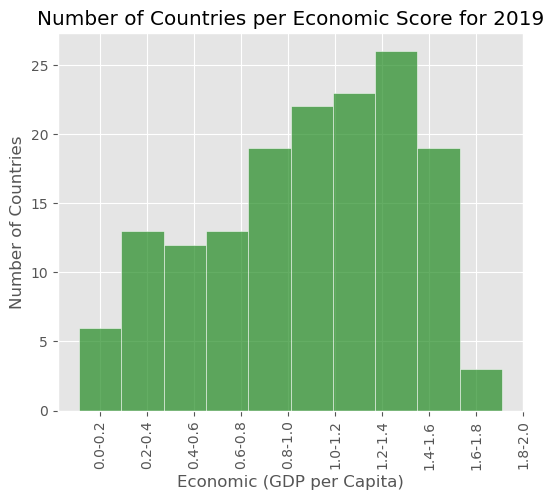

In [155]:
# create Histogram

eco_df = df_2019
eco_df = eco_df.sort_values("Economy (GDP per Capita)", ascending=True)

# Create the bins in which Data will be held for ages 
bins = [0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2]
# Create the names for the  bins
group_names = ["0.0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0", "1.0-1.2", "1.2-1.4", "1.4-1.6","1.6-1.8","1.8-2.0"]
# Cut them
eco_df["Economy"] = pd.cut(eco_df["Economy (GDP per Capita)"], bins=10, labels=group_names, include_lowest=True)


#Create Histogram
plt.figure(figsize=(6, 5), dpi=100)
plt.style.use("ggplot")
plt.hist(eco_df.Economy, color="forestgreen", alpha=0.70, ec="white", align="left")
plt.xlabel("Economic (GDP per Capita)")
plt.ylabel("Number of Countries")
plt.xticks(rotation=90)
plt.title("Number of Countries per Economic Score for 2019")
png_filepath = "Images/Eco_histogram.png"
plt.savefig(png_filepath)
plt.show()

In [49]:
eco_df

,Unnamed: 0,Country,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family/Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Unnamed: 11,Unnamed: 12,Unnamed: 13,Happiness_Ranges,Economy
111,111,Somalia,2019,112,4.668,0.000,0.698,0.268,0.559,0.270,0.243,NaN,NaN,NaN,4.3-4.8,0.0-0.2
154,154,Central African Republic,2019,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,NaN,NaN,NaN,<3.3,0.0-0.2
144,144,Burundi,2019,145,3.775,0.046,0.447,0.380,0.220,0.180,0.176,NaN,NaN,NaN,3.3-3.8,0.0-0.2
140,140,Liberia,2019,141,3.975,0.073,0.922,0.443,0.370,0.033,0.233,NaN,NaN,NaN,3.8-4.3,0.0-0.2
126,126,Congo (Kinshasa),2019,127,4.418,0.094,1.125,0.357,0.269,0.053,0.212,NaN,NaN,NaN,4.3-4.8,0.0-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,50,Kuwait,2019,51,6.021,1.500,1.319,0.808,0.493,0.097,0.142,NaN,NaN,NaN,5.8-6.3,1.6-1.8
20,20,United Arab Emirates,2019,21,6.825,1.503,1.310,0.825,0.598,0.182,0.262,NaN,NaN,NaN,6.8-7.3,1.6-1.8
33,33,Singapore,2019,34,6.262,1.572,1.463,1.141,0.556,0.453,0.271,NaN,NaN,NaN,5.8-6.3,1.8-2.0
13,13,Luxembourg,2019,14,7.090,1.609,1.479,1.012,0.526,0.316,0.194,NaN,8.0,1.2,6.8-7.3,1.8-2.0


# Family

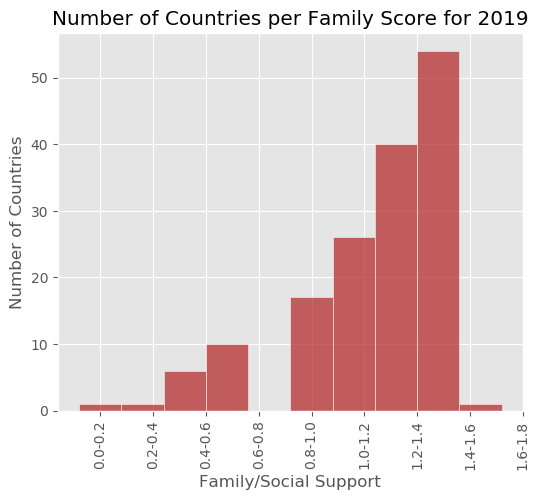

In [154]:
# create Histogram

fam_df = df_2019
fam_df = fam_df.sort_values("Family/Social Support", ascending=True)

# Create the bins in which Data will be held for ages 
bins = [0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8]
# Create the names for the  bins
group_names = ["0.0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0", "1.0-1.2", "1.2-1.4", "1.4-1.6","1.6-1.8"]
# Cut them
fam_df["Family"] = pd.cut(fam_df["Family/Social Support"], bins, labels=group_names, include_lowest=True)



#Create Histogram
plt.figure(figsize=(6, 5), dpi=100)
plt.style.use("ggplot")
plt.hist(fam_df.Family, color="firebrick", alpha=0.70, ec="white", align="left")
plt.xlabel("Family/Social Support")
plt.ylabel("Number of Countries")
plt.xticks(rotation=90)
plt.title("Number of Countries per Family Score for 2019")
png_filepath = "Images/Family_histogram.png"
plt.savefig(png_filepath)
plt.show()

In [144]:
fam_df

,Unnamed: 0,Country,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family/Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Unnamed: 11,Unnamed: 12,Unnamed: 13,Happiness_Ranges,Economy,Family
154,154,Central African Republic,2019,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,NaN,NaN,NaN,<3.3,0.0-0.2,0.0-0.2
148,148,Syria,2019,149,3.462,0.619,0.378,0.440,0.013,0.141,0.331,NaN,NaN,NaN,3.3-3.8,0.6-0.8,0.2-0.4
101,101,Benin,2019,102,4.883,0.393,0.437,0.397,0.349,0.082,0.175,NaN,NaN,NaN,4.8-5.3,0.4-0.6,0.4-0.6
144,144,Burundi,2019,145,3.775,0.046,0.447,0.380,0.220,0.180,0.176,NaN,NaN,NaN,3.3-3.8,0.0-0.2,0.4-0.6
153,153,Afghanistan,2019,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,NaN,NaN,NaN,<3.3,0.4-0.6,0.4-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,7,New Zealand,2019,8,7.307,1.303,1.557,1.026,0.585,0.380,0.330,NaN,2.0,0.2,7.3-7.8,1.4-1.6,1.4-1.6
1,1,Denmark,2019,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,NaN,NaN,NaN,7.3-7.8,1.6-1.8,1.4-1.6
2,2,Norway,2019,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,NaN,NaN,Economy,7.3-7.8,1.6-1.8,1.4-1.6
0,0,Finland,2019,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,NaN,NaN,NaN,7.3-7.8,1.4-1.6,1.4-1.6


# Health

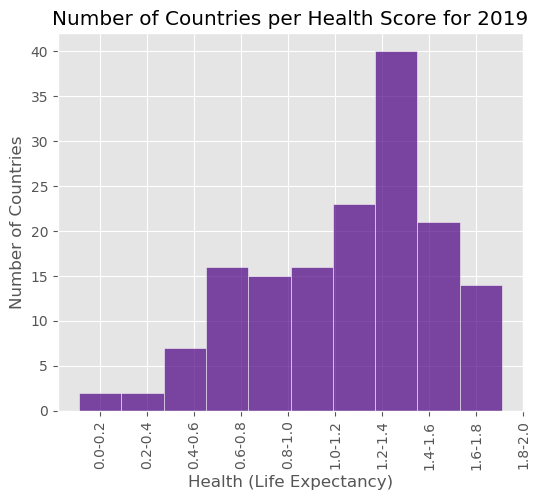

In [153]:
# create Histogram

health_df = df_2019
health_df = health_df.sort_values("Health (Life Expectancy)", ascending=True)

# Create the bins in which Data will be held for ages 
bins = [0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2]
# Create the names for the  bins
group_names = ["0.0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0", "1.0-1.2", "1.2-1.4", "1.4-1.6","1.6-1.8","1.8-2.0"]
# Cut them
health_df["Health"] = pd.cut(health_df["Health (Life Expectancy)"], bins=10, labels=group_names, include_lowest=True)



#Create Histogram
plt.figure(figsize=(6, 5), dpi=100)
plt.style.use("ggplot")
plt.hist(health_df.Health, color="indigo", alpha=0.70, ec="white", align="left")
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Number of Countries")
plt.xticks(rotation=90)
plt.title("Number of Countries per Health Score for 2019")
png_filepath = "Images/Health_histogram.png"
plt.savefig(png_filepath)
plt.show()

In [95]:
health_df

,Unnamed: 0,Country,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family/Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Unnamed: 11,Unnamed: 12,Unnamed: 13,Happiness_Ranges,Economy,Family
134,134,Swaziland,2019,135,4.212,0.811,1.149,0.000,0.313,0.135,0.074,NaN,NaN,NaN,3.8-4.3,0.8-1.0,1.4-1.6
154,154,Central African Republic,2019,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,NaN,NaN,NaN,<3.3,0.0-0.2,0.0-0.2
143,143,Lesotho,2019,144,3.802,0.489,1.169,0.168,0.359,0.093,0.107,NaN,NaN,NaN,3.8-4.3,0.4-0.6,1.4-1.6
131,131,Chad,2019,132,4.350,0.350,0.766,0.192,0.174,0.078,0.198,NaN,NaN,NaN,4.3-4.8,0.4-0.6,0.8-1.0
98,98,Ivory Coast,2019,99,4.944,0.569,0.808,0.232,0.352,0.090,0.154,NaN,NaN,NaN,4.8-5.3,0.6-0.8,0.8-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,Switzerland,2019,6,7.480,1.452,1.526,1.052,0.572,0.343,0.263,NaN,NaN,0.1684,7.3-7.8,1.6-1.8,1.8-2.0
29,29,Spain,2019,30,6.354,1.286,1.484,1.062,0.362,0.079,0.153,NaN,NaN,NaN,6.3-6.8,1.4-1.6,1.8-2.0
57,57,Japan,2019,58,5.886,1.327,1.419,1.088,0.445,0.140,0.069,NaN,NaN,NaN,5.8-6.3,1.4-1.6,1.6-1.8
75,75,Hong Kong,2019,76,5.430,1.438,1.277,1.122,0.440,0.287,0.258,NaN,NaN,NaN,5.3-5.8,1.6-1.8,1.4-1.6
